## MATH 151 Lab  6

Section Number: 568


Members:


- Brighton Sikarskie
- Colton Hesser
- Gabriel Gonzalez
- Gabriel Cuevas

In [34]:
from sympy import *
from sympy.plotting import (plot,plot_parametric)

### Question 1

#### 1a

In [35]:
# find the values of r for which y = e^(rx) is a solution to the differential equation
# 2y'' + y' - y = 0
r, x = symbols('r x')
y = exp(r * x)
yprime = y.diff(x)
yprimeprime = yprime.diff(x)
eq = 2 * yprimeprime + yprime - y

# solve for r
solutions = solve(eq, r)

# print the solutions
print(f"The values of r for which {y} is a solution to the differential equation {eq} are {solutions[0]} and {solutions[1]}.")

The values of r for which exp(r*x) is a solution to the differential equation 2*r**2*exp(r*x) + r*exp(r*x) - exp(r*x) are -1 and 1/2.


#### 1b

In [36]:
# using y'' + 6y' + 10y = 0
eq = yprimeprime + 6 * yprime + 10 * y
solutions = solve(eq, r)
print(f"The values of r for which {y} is a solution to the differential equation {eq} are {solutions[0]} and {solutions[1]}.")

The values of r for which exp(r*x) is a solution to the differential equation r**2*exp(r*x) + 6*r*exp(r*x) + 10*exp(r*x) are -3 - I and -3 + I.


#### 1c

In [37]:
y = exp(-3 * x) * (cos(x) + sin(x))
yprime = y.diff(x)
yprimeprime = yprime.diff(x)
# using y'' + 6y' + 10y = 0
eq = yprimeprime + 6 * yprime + 10 * y
solutions = solve(eq, x)
print(f"The values of x for which {y} is a solution to the differential equation {eq} are {solutions}.")
print(f"Since there are no solutions when using y = {y} and there are only imaginary solutions when using y = {exp(r * x)}, the differential equation y'' + 6' + 10y has no real solutions.")


The values of x for which (sin(x) + cos(x))*exp(-3*x) is a solution to the differential equation (-sin(x) - cos(x))*exp(-3*x) + (sin(x) + cos(x))*exp(-3*x) are [].
Since there are no solutions when using y = (sin(x) + cos(x))*exp(-3*x) and there are only imaginary solutions when using y = exp(r*x), the differential equation y'' + 6' + 10y has no real solutions.


### Question 2

#### 2a

In [38]:
# given the vector <e^(2sin(t)), e^(cos(t))>
# find the equation for the tangent line to the curve at t = pi/6
x, t = symbols('x t')
vector = (exp(2 * sin(t)), exp(cos(t)))
vectorprime = (vector[0].diff(t), vector[1].diff(t))

m = vectorprime[1] / vectorprime[0]
b = vector[1] - m * vector[0]
eq = m * x + b

print(f"The equation of the tangent line to the curve at t = pi/6 is y = {eq.subs(t, pi / 6)} which is approximatly {eq.subs(t, pi / 6).evalf()}.")

The equation of the tangent line to the curve at t = pi/6 is y = -sqrt(3)*x*exp(-1)*exp(sqrt(3)/2)/6 + sqrt(3)*exp(sqrt(3)/2)/6 + exp(sqrt(3)/2) which is approximatly 3.06375125950142 - 0.252478818450665*x.


#### 2b

In [39]:
# find the points where the tangent line is horizontal
horizontal_t_values = solve(vectorprime[1], t)
print(f"The tangent line is horizontal at t = {horizontal_t_values[0]} and t = {horizontal_t_values[1]}.")
# using the values for t find the points where the tangent line is horizontal
horizontal_points = []
for t_val in horizontal_t_values:
    horizontal_points.append((vector[0].subs(t, t_val), vector[1].subs(t, t_val)))
print(f"The points where the tangent line is horizontal are {horizontal_points}.")

# find the points where the tangent line is vertical
vertical_t_values = solve(vectorprime[0], t)
print(f"The tangent line is vertical at t = {vertical_t_values[0]} and t = {vertical_t_values[1]}.")
# using the values for t find the points where the tangent line is vertical
vertical_points = []
for t_val in vertical_t_values:
    vertical_points.append((vector[0].subs(t, t_val), vector[1].subs(t, t_val)))
print(f"The points where the tangent line is vertical are {vertical_points}.")

The tangent line is horizontal at t = 0 and t = pi.
The points where the tangent line is horizontal are [(1, E), (1, exp(-1))].
The tangent line is vertical at t = pi/2 and t = 3*pi/2.
The points where the tangent line is vertical are [(exp(2), 1), (exp(-2), 1)].


#### 2c

The equations of the horizontal tangent lines are y = E and y = exp(-1).
The equations of the vertical tangent lines are x = exp(2) and x = exp(-2).


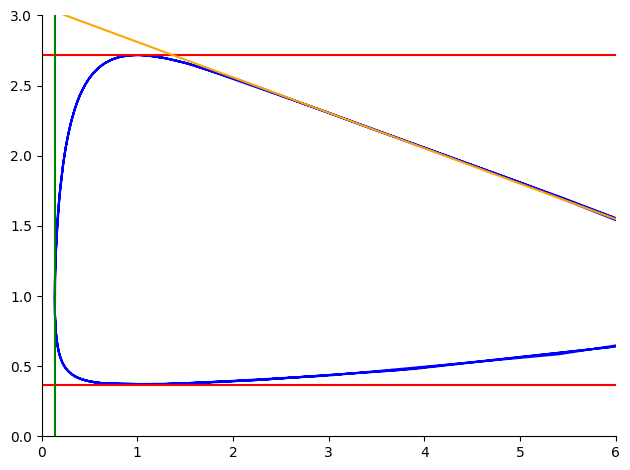

The graph above shows the vector function, the horizontal tangent lines, the vertical tangent lines, and the tangent line at t = pi/6.
Shown in blue is the vector function (exp(2*sin(t)), exp(cos(t))). The red lines are the horizontal tangent lines. The green lines are the vertical tangent lines. The orange line is the tangent line at t = pi/6.


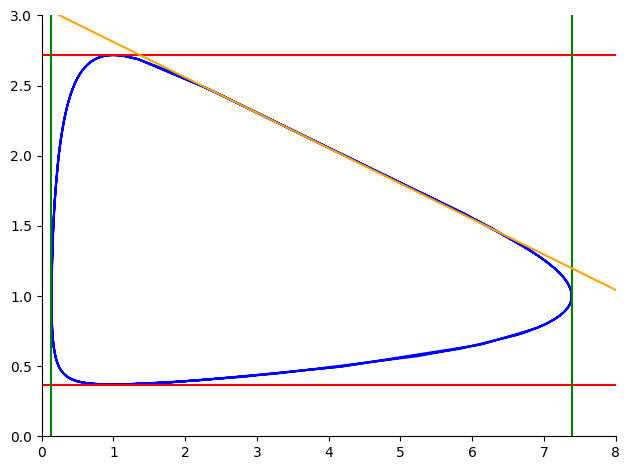

Since the first graph did not show the full vector function and the other vertical tangent lines, I plotted the vector function again with a larger range.
The colors of the lines are the same as the first graph.


In [40]:
# find the equations of the horizontal tangent lines
horizontal_tangent_lines = []
for t_val in horizontal_t_values:
    # eq = vectorprime[1] / vectorprime[0] * x + vector[1] - (vectorprime[1] / vectorprime[0]) * vector[0]
    horizontal_tangent_lines.append(eq.subs(t, t_val))
print(f"The equations of the horizontal tangent lines are y = {horizontal_tangent_lines[0]} and y = {horizontal_tangent_lines[1]}.")

# find the equations of the vertical tangent lines
vertical_tangent_lines = []
for t_val in vertical_t_values:
    vertical_tangent_lines.append(vector[0].subs(t, t_val))

print(f"The equations of the vertical tangent lines are x = {vertical_tangent_lines[0]} and x = {vertical_tangent_lines[1]}.")

#plot the vector function on t = [0, 2pi]
t = symbols('t')
plot_ = plot_parametric(vector, show=False, line_color='blue')
# plot the horizontal tangent lines
for line in horizontal_tangent_lines:
    plot_.extend(plot(line, show=False, line_color='red'))
# plot the vertical tangent lines
for line in vertical_tangent_lines:
    # plot these lines a paramertic equation since they are vertical
    plot_.extend(plot_parametric(line, t, show=False, line_color='green'))
# tangent line at pi/6 from 2a
plot_.extend(plot(eq.subs(t, pi / 6), show=False, line_color='orange'))

# change the x and y limits
plot_.xlim = (0, int(2 * pi))
plot_.ylim = (0, int(pi))
plot_.show()

print(f"The graph above shows the vector function, the horizontal tangent lines, the vertical tangent lines, and the tangent line at t = pi/6.")
print(f"Shown in blue is the vector function {vector}. The red lines are the horizontal tangent lines. The green lines are the vertical tangent lines. The orange line is the tangent line at t = pi/6.")

# the graph doesnt show the full vector function so I will plot it again with a larger range
plot_.xlim = (0, int(2.75 * pi))
plot_.show()
print(f"Since the first graph did not show the full vector function and the other vertical tangent lines, I plotted the vector function again with a larger range.")
print(f"The colors of the lines are the same as the first graph.")

### Question 3

#### 3a

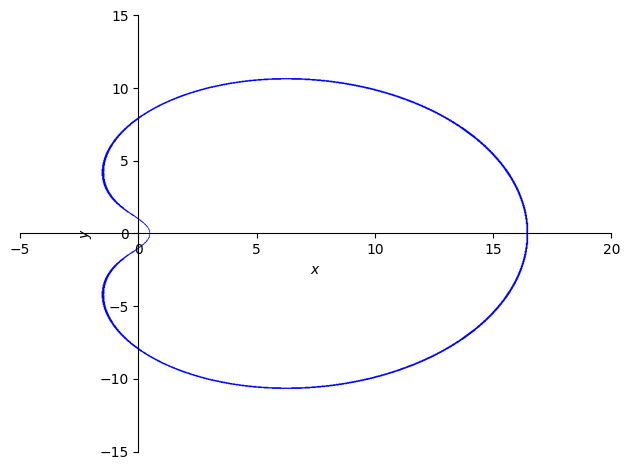

In [41]:
# using the variation of a limacon curve I will move everything to one side making 0 = ...
x, y = symbols('x y')
left_side = (-((x **2 + y ** 2) / 4) + 2 * x - 2) ** 2
right_side = 5 * (x ** 2 + y ** 2)
eq = left_side - right_side

# plotting the equation with plot_implicit
# with x = [-5, 20] and y = [-15, 15]
plot_ = plot_implicit(eq, (x, -5, 20), (y, -15, 15))


#### 3b

In [42]:
# finding dy/dx using implicit differentiation (idiff)
dydx = idiff(eq, y, x)
print(f"The equation for dy/dx is {dydx}.")

The equation for dy/dx is (-x**3/y + 12*x**2/y - x*y + 4*y + 32/y)/(x**2 - 8*x + y**2 - 32).


#### 3c

In [43]:
# finding the coordinates where the graph has vertical tangent lines
vertical_tangents = solve([denom(dydx), eq], [x, y])
print(f"The coordinates of the points where the graph has vertical tangent lines are {vertical_tangents}.")

The coordinates of the points where the graph has vertical tangent lines are [(-3/2, -sqrt(71)/2), (-3/2, sqrt(71)/2)].


#### 3d

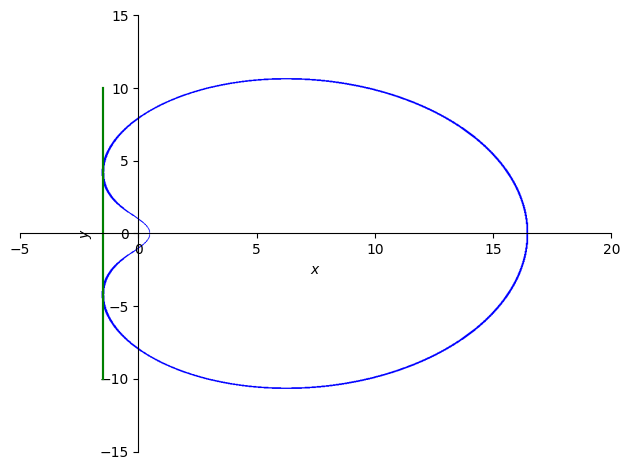

The graph above shows the equation for the limacon curve, and the vertical tangent lines.
The green lines are the vertical tangent lines. The equation for the limacon curve is -5*x**2 - 5*y**2 + (-x**2/4 + 2*x - y**2/4 - 2)**2 and is shown in blue.


In [44]:
plot_ = plot_implicit(eq, (x, -5, 20), (y, -15, 15), show=False)
# plotting the vertical tangent lines
for point in vertical_tangents:
    t = symbols('t')
    plot_.extend(plot_parametric(point[0], t, show=False, line_color='green'))
plot_.show()

print(f"The graph above shows the equation for the limacon curve, and the vertical tangent lines.")
print(f"The green lines are the vertical tangent lines. The equation for the limacon curve is {eq} and is shown in blue.")


### Question 4

#### 4a

In [45]:
x = symbols('x')
numerator = x ** (1 / 5) * sqrt(x ** 3 + 1)
denominator = (2 - 7 * x) ** 4
eq = numerator / denominator

# use logarithmic differentiation to find dy/dx
dydx_expand_log = diff(expand_log(eq), x)
print(f"The equation for dy/dx using `expand_log()` is {dydx_expand_log}.")

The equation for dy/dx using `expand_log()` is 0.2*sqrt(x**3 + 1)/(x**0.8*(2 - 7*x)**4) + 28*x**0.2*sqrt(x**3 + 1)/(2 - 7*x)**5 + 3*x**2.2/(2*(2 - 7*x)**4*sqrt(x**3 + 1)).


#### 4b

In [46]:
dydx = diff(eq, x)
print(f"The equation for dy/dx not using `expand_log()` is {dydx}.")

The equation for dy/dx not using `expand_log()` is 0.2*sqrt(x**3 + 1)/(x**0.8*(2 - 7*x)**4) + 28*x**0.2*sqrt(x**3 + 1)/(2 - 7*x)**5 + 3*x**2.2/(2*(2 - 7*x)**4*sqrt(x**3 + 1)).


#### 4c

In [47]:
print(f"The equation for dy/dx using `expand_log()` and simplified is {dydx_expand_log.simplify()}.")
print(f"The equation for dy/dx not using `expand_log`() and simplified is {dydx.simplify()}.")

print("Looking at the equations that are simplified we can see that both methods yield the same result.")
print(f"we can also use python to check if the equations are equal and return True if they are equal and False if they are not equal. Comparing with python: {dydx_expand_log.simplify() == dydx.simplify()}.")

The equation for dy/dx using `expand_log()` and simplified is (-56*x**1.0*(x**3 + 1) + 3*x**3.0*(7*x - 2) + 0.4*(7*x - 2)*(x**3 + 1))/(2*x**0.8*(7*x - 2)**5*sqrt(x**3 + 1)).
The equation for dy/dx not using `expand_log`() and simplified is (-56*x**1.0*(x**3 + 1) + 3*x**3.0*(7*x - 2) + 0.4*(7*x - 2)*(x**3 + 1))/(2*x**0.8*(7*x - 2)**5*sqrt(x**3 + 1)).
Looking at the equations that are simplified we can see that both methods yield the same result.
we can also use python to check if the equations are equal and return True if they are equal and False if they are not equal. Comparing with python: True.
